In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")

In [2]:
df_raw = pd.read_csv('homework_dataset.csv')

In [3]:
df_raw.head().transpose()

,0,1,2,3,4
user_id,77656618388e134648db01eecf7e79ee,a2497e0c763a7e5640fbf05e53fe0466,759735d092819085c125a5cf81faf24b,df9627db375322e65f4648ca72f4c630,5672b2f16063ed75fbb304fee57c024b
request_id,2e9f911150e3a79e8d71a35779706e4c,69cdf2f9ab2f59d10b636dc86bc9d7b7,5d7d30d709268f22f1a73ddbd6601690,0df2fc0a4a31595678cd1de3fad57e15,7dcbf32659ae5ef61e10e5174a314d7d
target_recipient_id,992e0a729d6380d3b50aef5aa7c22572,02878ea857dbc90b2ed89b8f3488d501,927d3808cdc31d61226ae7c80bc8de16,0411b7eb4c220a14876e77da8125f79b,dc248a1266709a71e45c40f33056bbb1
date_user_created,27/01/2014 15:02,12/10/2015 15:35,04/10/2016 11:42,17/10/2014 00:27,12/08/2015 07:45
addr_country_code,DEU,CAN,GBR,GBR,FRA
addr_city,Berlin,toronto,bolton,swindon,paris
recipient_country_code,GB,US,PT,IN,GB
flag_personal_business,Personal,Personal,Personal,Personal,Personal
payment_type,Direct Debit,NaN,Bank Transfer,Cards,Cards
date_request_submitted,26/08/2016 07:35,23/10/2016 22:54,26/10/2016 13:42,28/01/2015 23:36,18/08/2015 08:55


In [180]:
# df_clean = df_raw['payment_status'] != 'Cancelled'
df_clean = df_raw[['user_id','target_recipient_id', 'date_user_created', 'request_id',
        'recipient_country_code',
       'flag_personal_business', 'payment_type', 'invoice_value', 
        'payment_status', 
       'transfer_to_self', 'date_request_submitted',
       'payment_reference_classification', 'device', 'transfer_sequence',
       'days_since_previous_req', 'first_attempt_date', 'first_success_date']]
df_clean['tenure_acc_created_days'] =  (pd.to_datetime(df_raw['date_request_submitted'].str[0:10], format='%d/%m/%Y', errors='ignore') - pd.to_datetime(df_raw['date_user_created'].str[0:10], format='%d/%m/%Y', errors='ignore')).dt.days
# df_clean = df_clean[df_clean['tenure_acc_created_days']>0]

<ipython-input-180-5a9dbbb64bf0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tenure_acc_created_days'] =  (pd.to_datetime(df_raw['date_request_submitted'].str[0:10], format='%d/%m/%Y', errors='ignore') - pd.to_datetime(df_raw['date_user_created'].str[0:10], format='%d/%m/%Y', errors='ignore')).dt.days


In [5]:
df_big = df_clean[df_clean['invoice_value'] >= 4965.99]

In [199]:
df_clean['date_request'] = pd.to_datetime(df_clean['date_request_submitted'].str[3:10], format='%m/%Y', errors='ignore')

<ipython-input-199-d63cc7710a3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date_request'] = pd.to_datetime(df_clean['date_request_submitted'].str[3:10], format='%m/%Y', errors='ignore')


In [200]:
daily_trx = df_clean.groupby(['date_request'], as_index= False).agg({'user_id':'nunique', 'request_id':'nunique', 'target_recipient_id' :'nunique', 'invoice_value' : 'sum'})

<AxesSubplot:xlabel='date_request', ylabel='user_id'>

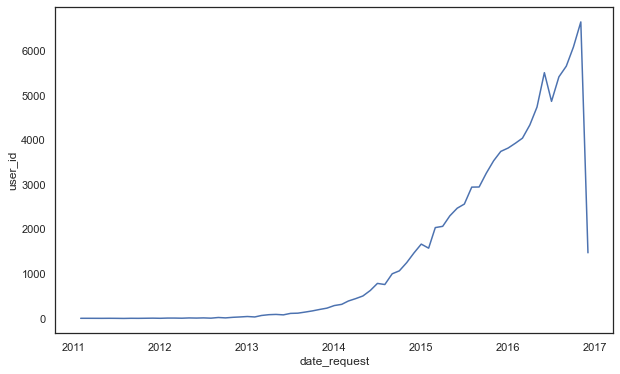

In [202]:
sns.lineplot(x= 'date_request', y='user_id', data = daily_trx)

### Grouping user

In [183]:
df_user = df_clean.groupby(['user_id'], as_index = False).agg({
   'request_id':'nunique',
    'target_recipient_id' :'nunique',
    'date_user_created' :  'min',
#     'addr_country_code':'nunique',
#     'addr_city':'nunique',
    'recipient_country_code' :'nunique',
    'flag_personal_business' : 'nunique',
    'payment_type' : 'nunique',
    'invoice_value' : 'sum',
    'transfer_sequence' : 'max',
    'tenure_acc_created_days' : 'max'
#     'first_attempt_date': 'min',
# 'first_success_date' : 'min' 
})

In [168]:
df_recipient = df_clean.groupby(['target_recipient_id'], as_index = False).agg({
   'request_id':'nunique',
    'user_id' :'nunique',
    'date_user_created' :  'min',
#     'addr_country_code':'nunique',
#     'addr_city':'nunique',
    'recipient_country_code' :'nunique',
    'flag_personal_business' : 'nunique',
    'payment_type' : 'nunique',
    'invoice_value' : 'sum',
    'transfer_sequence' : 'max',
    'tenure_acc_created_days' : 'max'
#     'first_attempt_date': 'min',
# 'first_success_date' : 'min' 
})

In [169]:
df_recipient.sort_values(['user_id'], ascending= False)

,target_recipient_id,request_id,user_id,date_user_created,recipient_country_code,flag_personal_business,payment_type,invoice_value,transfer_sequence,tenure_acc_created_days
22069,3b66475e924ac6f5cdb845930d772529,16,6,04/07/2013 17:30,1,2,2,2548.716178,1429.0,563
31732,55602ba1d012407008f2c555b98fa9ef,6,6,06/05/2016 14:00,1,1,1,399.174792,1.0,150
89265,f144f57b8e574a181463aed16a6092e3,5,5,07/02/2016 22:41,1,1,2,1648.719326,4.0,123
3880,0aa79d6a6ca2c2770ee188d62b162516,4,4,15/06/2016 11:40,1,1,1,61.611661,1.0,0
48503,828cf566b7a7a6704f3d938c4611e28b,3,3,21/07/2016 16:26,1,1,1,923.576804,10.0,65
...,...,...,...,...,...,...,...,...,...,...
31598,54ffb66b8a5d96b9227e8d25a1c639a5,1,1,05/03/2016 17:35,1,1,0,0.000000,1.0,0
31597,54ffab2a7fd2830477ccf4dbdd097183,1,1,26/10/2013 17:26,1,1,1,1049.770000,6.0,550
31596,54ff45afe07ca13641c4fb068f18d074,1,1,25/11/2015 20:06,1,1,0,0.000000,1.0,50
31595,54fd053676b01b9a583fd8c5138f8f48,1,1,28/03/2016 09:50,1,1,1,426.631639,4.0,92


In [170]:
df_rec_susp = df_recipient.sort_values(['user_id'], ascending = False).head(15)
df_network = df_clean[df_clean['target_recipient_id'].isin(df_rec_susp['target_recipient_id'])]

In [171]:
df_clean[df_clean['target_recipient_id']== '55602ba1d012407008f2c555b98fa9ef']

,user_id,target_recipient_id,date_user_created,request_id,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,invoice_value,payment_status,transfer_to_self,date_request_submitted,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,tenure_acc_created_days
19781,3707130e08ee9bced3b79860c7db144c,55602ba1d012407008f2c555b98fa9ef,15/06/2016 10:48,81605217cf4fec717864119a6a1f73fa,PT,Personal,Cards,15/06/2016 10:54,226.702048,Transferred,N.A. Sender or Recipient is business,15/06/2016 10:54,invoice,Desktop Web,1.0,NaN,15/06/2016 10:54,15/06/2016 10:55,0
80177,58cf90109c34a2ac99812c781d7b6dc3,55602ba1d012407008f2c555b98fa9ef,24/05/2016 21:26,bf2f6639ce48f7fe5c613ffa061e1ce8,PT,Personal,NaN,25/05/2016 17:30,NaN,Cancelled,N.A. Sender or Recipient is business,25/05/2016 17:30,invoice,Desktop Web,1.0,NaN,25/05/2016 17:30,NaN,1
87471,045c24af1d23d6490e54d52d5375a7ad,55602ba1d012407008f2c555b98fa9ef,13/11/2016 12:39,d6afea9a76b5275f30b33242f8db66fd,PT,Personal,Cards,15/11/2016 16:10,35.820000,Transferred,N.A. Sender or Recipient is business,15/11/2016 16:10,invoice,Desktop Web,1.0,NaN,15/11/2016 16:10,16/11/2016 07:17,2
88571,e423c71f73dca7a940b474e3cb5f7e4a,55602ba1d012407008f2c555b98fa9ef,06/05/2016 14:00,4f7de90eaf6786b4c582d2a8abdbaf37,PT,Personal,Cards,03/10/2016 09:24,22.474523,Transferred,N.A. Sender or Recipient is business,03/10/2016 09:24,invoice,Desktop Web,1.0,NaN,03/10/2016 09:24,03/10/2016 12:35,150
89042,8978d6a317be227fbdd9c84ad8e145ae,55602ba1d012407008f2c555b98fa9ef,28/11/2016 16:52,5ae016c37b811ca615a623a87ee4cba3,PT,Personal,Cards,28/11/2016 16:57,79.419168,Transferred,N.A. Sender or Recipient is business,28/11/2016 16:57,Other/unknown,Desktop Web,1.0,NaN,28/11/2016 16:57,28/11/2016 16:58,0
99538,4ebd9900fd00afb77fbbc6704c448712,55602ba1d012407008f2c555b98fa9ef,27/05/2016 15:14,b9f638bf1f3f8e2322ee00226d6ca386,PT,Personal,Cards,27/05/2016 15:17,34.759053,Transferred,N.A. Sender or Recipient is business,27/05/2016 15:17,invoice,Desktop Web,1.0,NaN,27/05/2016 15:17,27/05/2016 15:18,0


In [129]:
x = df_user[(df_user['invoice_value'] >= 2700) & (df_user['tenure_acc_created_days'] <= 10000)]

x.sort_values(['request_id'], ascending = False).head(15)

,user_id,request_id,target_recipient_id,date_user_created,recipient_country_code,flag_personal_business,payment_type,invoice_value,transfer_sequence,tenure_acc_created_days
32254,69fd02c4fbd5bfa6533f7a5eac3bd81c,80,80,26/11/2014 11:04,4,1,1,11291.172933,9239.0,737
7859,19466121d8747bd79d1ec4d109b63c52,46,46,21/03/2014 16:11,4,2,1,12403.795251,4733.0,929
53612,b0c7ae2316c7e8214fd659e4bc8a0dea,24,19,02/09/2012 20:18,4,1,1,4649.650000,1952.0,1521
71004,e91068fff3d7fa1594dfdf3b4308433a,14,6,18/04/2012 08:21,4,2,2,2957.989768,1239.0,1379
18617,3c8ad764022826cb1e0a2c3ee6d85ef4,13,10,27/11/2013 16:57,4,1,2,31383.840000,838.0,1080
70028,e608d060011ee543263f345f9887c6c4,13,13,05/01/2015 07:36,1,1,1,2747.174387,1542.0,680
25743,54391c872fe1c8b4f98095c5d6ec7ec7,12,11,13/08/2012 13:49,3,1,1,60644.636536,1603.0,1565
61652,cb57cdb7cc459dc6fbbc33f91485b5e2,12,12,19/12/2012 12:19,5,1,1,5345.480000,1180.0,1413
67428,ddb3a4dd1e14f550e64c449bd8b333c3,11,11,02/03/2015 10:47,8,1,1,13268.660000,957.0,627
63192,d045c59a90d7587d8d671b5f5aec4e7c,9,9,26/07/2011 13:44,7,1,1,5335.700000,1325.0,1847


### EDA Categorical

In [10]:
cat_columns = ['addr_country_code', 'addr_city', 'recipient_country_code',
       'flag_personal_business', 'payment_status', 'payment_type', 'ccy_send', 'ccy_target',
       'transfer_to_self', 'sending_bank_country', 'device']
df_categorical = df_raw[cat_columns]

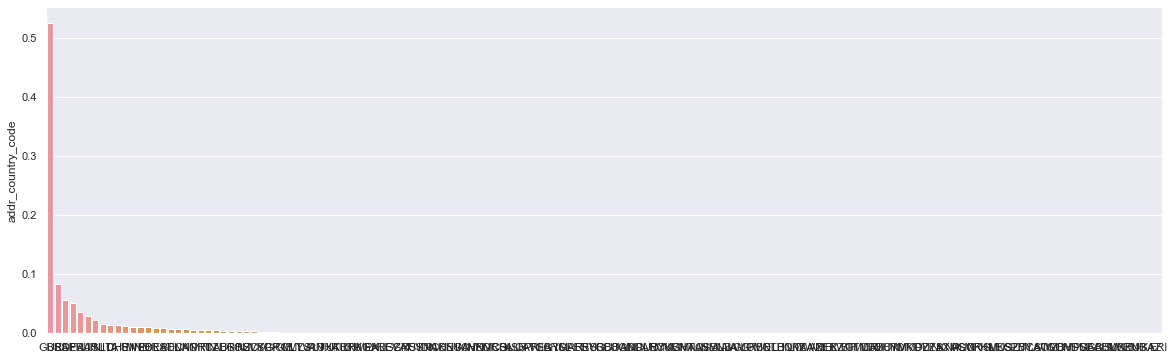

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20096 missing from c

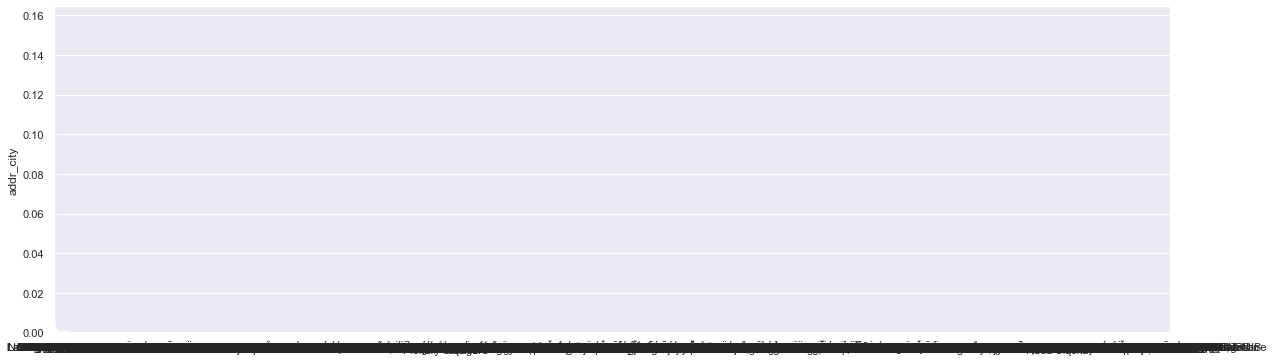

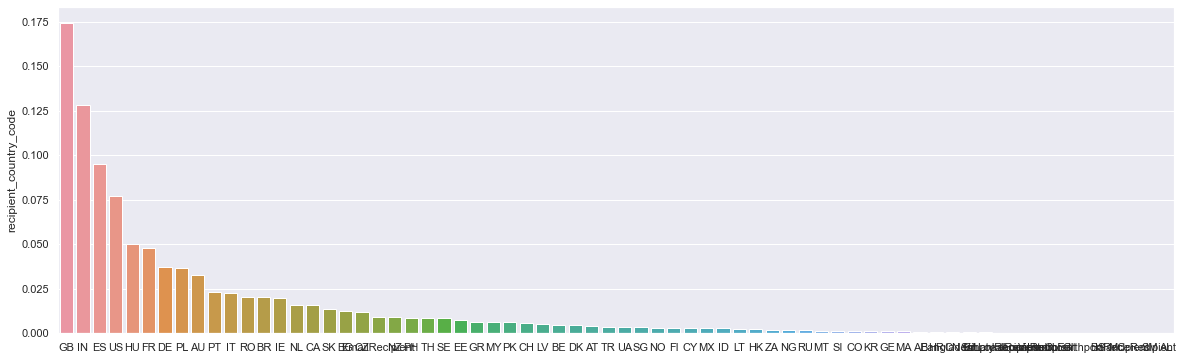

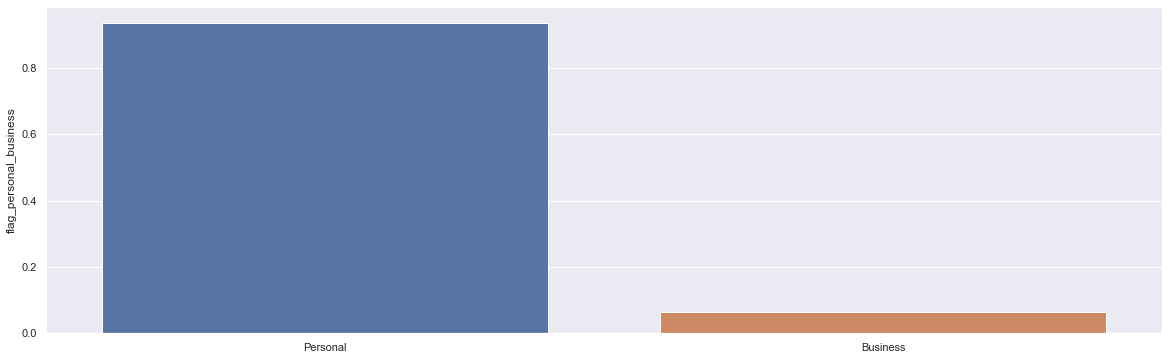

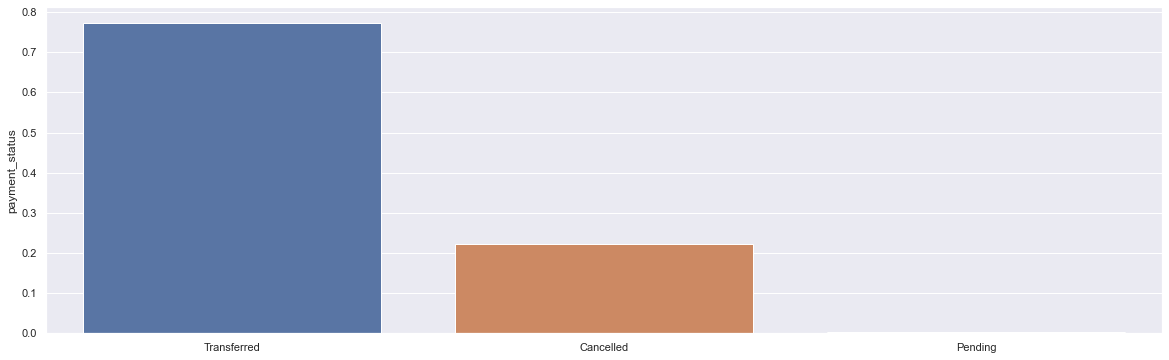

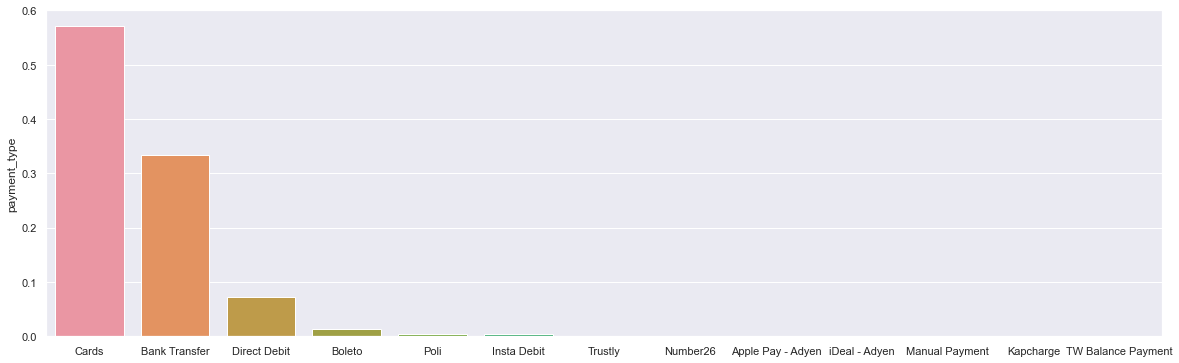

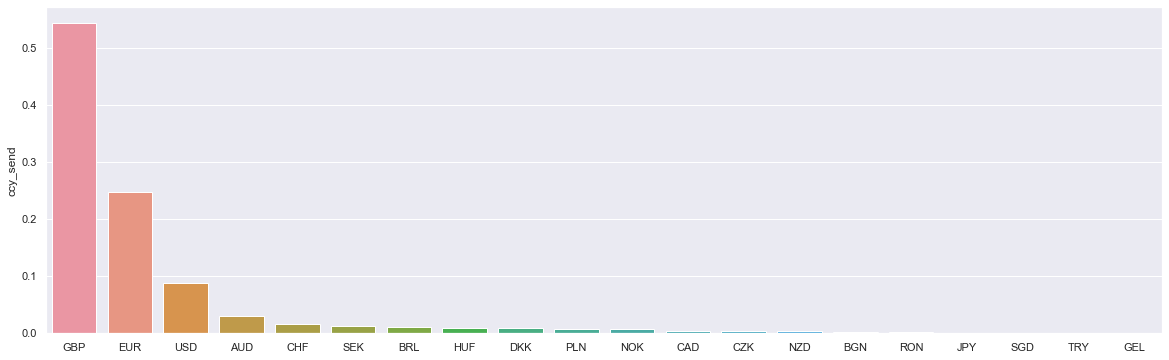

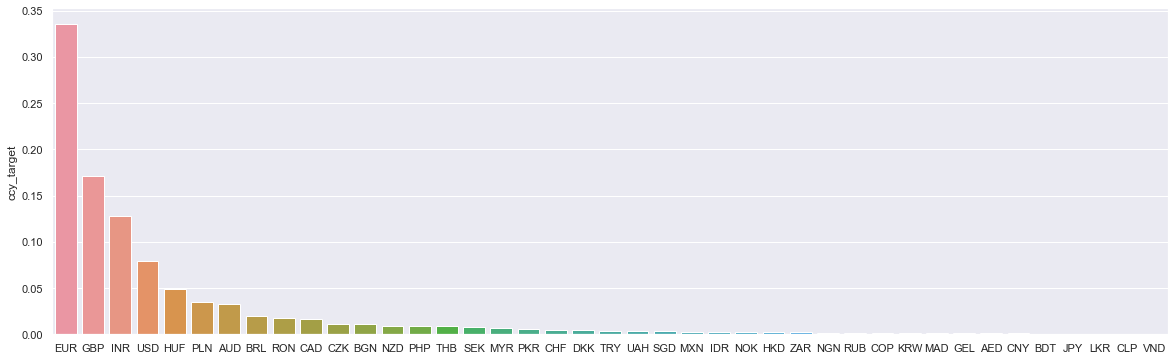

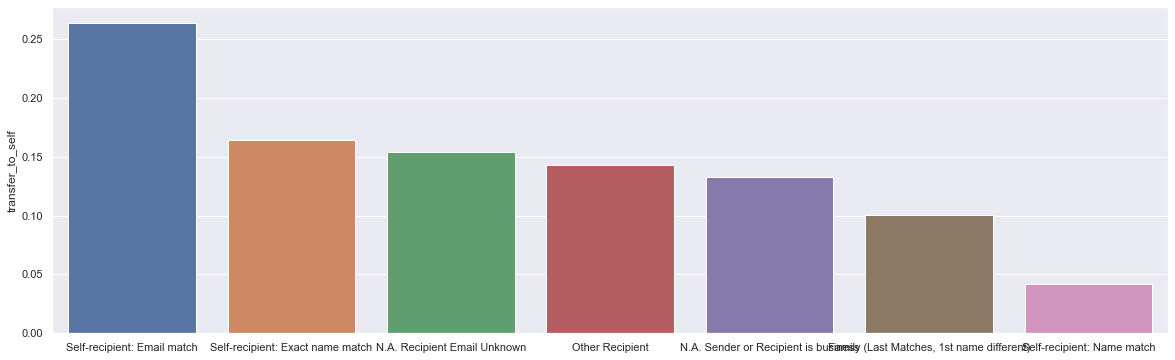

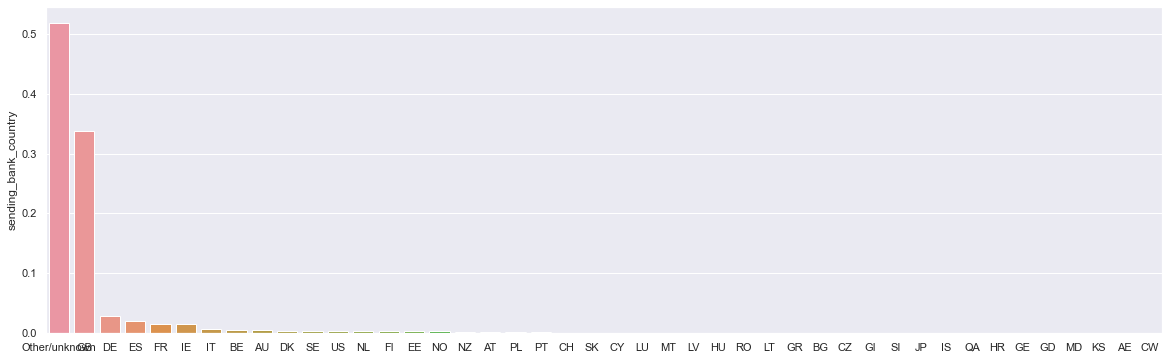

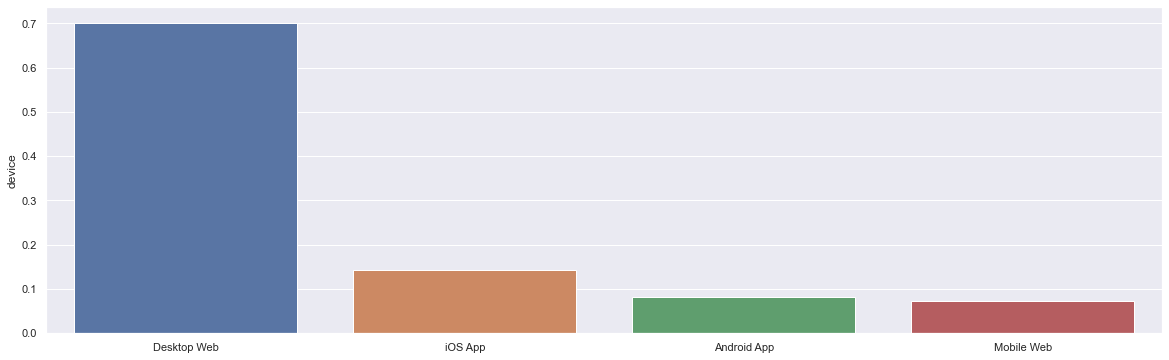

In [11]:
for column in df_categorical.columns:
    sns.barplot(x=df_categorical[column].value_counts().index,
                 y=df_categorical[column].value_counts(normalize = True))
    plt.show()

### EDA Numerical 
- transfer amount
- transfer amount per user 
- num transfer per user
- tenure
- tenure account vs transfer numb & amount
- tenure vs account destination

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mean: 1397.064559945015
Median: 425.52
percentile90: 2696.805553200008
percentile95: 4965.99
percentile99: 15774.336809999977
Std Dev: 6260.144475709911


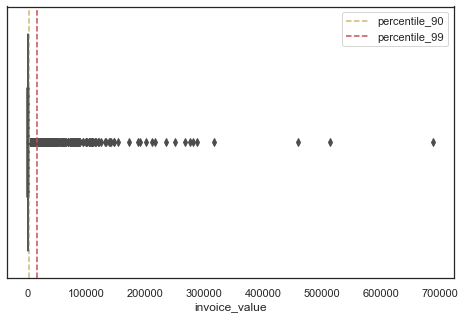

In [209]:
# x = np.log(df_raw['invoice_value'])
x = df_clean[(df_clean['invoice_value']<10000000)]['invoice_value']
sns.boxplot(x)
line1 = plt.axvline(x.quantile(.90), color="y", linestyle="--", label = "percentile_90")
line2 = plt.axvline(x.quantile(.99), color="r", linestyle="--", label = "percentile_99")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Mean:", x.mean())
print("Median:", x.median())
print("percentile90:", x.quantile(.9))
print("percentile95:", x.quantile(.95))
print("percentile99:", x.quantile(.99))
print("Std Dev:", x.std())
plt.show()

Mean: 1034.9006561242638
Median: 419.71737240000004
percentile90: 2496.1583694
percentile95: 4069.3488010499905
percentile99: 10000.0
Std Dev: 1770.2152569517368


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


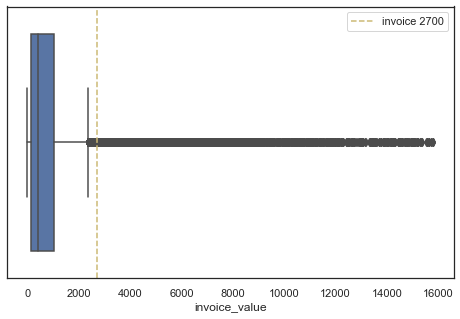

In [210]:
x = df_clean[(df_clean['invoice_value']<=15824.46)]['invoice_value']
sns.boxplot(x)
line1 = plt.axvline(2700, color="y", linestyle="--", label = "invoice 2700")
first_legend = plt.legend(handles=[line1], loc=1)
print("Mean:", x.mean())
print("Median:", x.median())
print("percentile90:", x.quantile(.9))
print("percentile95:", x.quantile(.95))
print("percentile99:", x.quantile(.99))
print("Std Dev:", x.std())
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mean: 15.447062112148489
Median: 7.0
percentile90: 33.0
percentile95: 50.0
percentile99: 115.0
Std Dev: 104.48709934402694


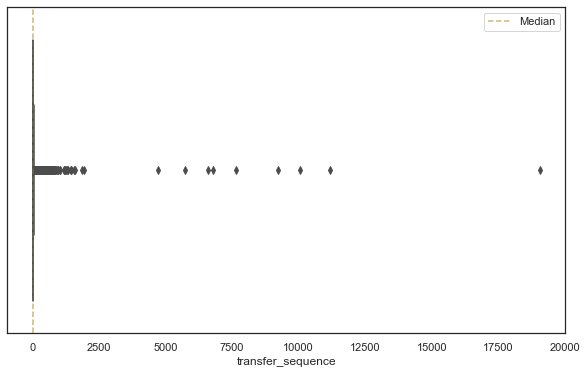

In [82]:
x = df_user['transfer_sequence']
sns.boxplot(x)
line1 = plt.axvline(x.median(), color="y", linestyle="--", label = "Median")
first_legend = plt.legend(handles=[line1], loc=1)
print("Mean:", x.mean())
print("Median:", x.median())
print("percentile90:", x.quantile(.9))
print("percentile95:", x.quantile(.95))
print("percentile99:", x.quantile(.99))
print("Std Dev:", x.std())
plt.show()

Mean: 274.5939357434283
Median: 202.0
percentile25: 68.0
percentile95: 783.0
percentile99: 1088.0
Std Dev: 258.2819513145703


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


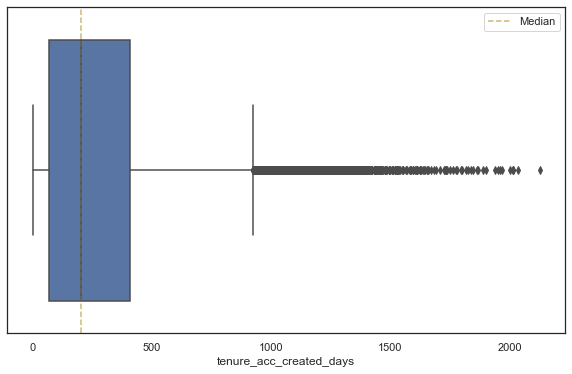

In [92]:
x = df_clean['tenure_acc_created_days']
sns.boxplot(x)
line1 = plt.axvline(x.median(), color="y", linestyle="--", label = "Median")
first_legend = plt.legend(handles=[line1], loc=1)
print("Mean:", x.mean())
print("Median:", x.median())
print("percentile25:", x.quantile(.25))
print("percentile95:", x.quantile(.95))
print("percentile99:", x.quantile(.99))
print("Std Dev:", x.std())
plt.show()

Mean: 16.405648684852963
Median: 8.0
percentile25: 0.0
percentile95: 61.0
percentile99: 90.0
Std Dev: 20.356125084984974


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


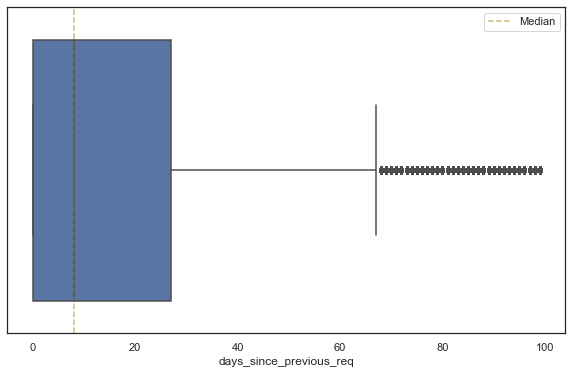

In [177]:
x = df_clean[df_clean['days_since_previous_req']<100]['days_since_previous_req']
sns.boxplot(x)
line1 = plt.axvline(x.median(), color="y", linestyle="--", label = "Median")
first_legend = plt.legend(handles=[line1], loc=1)
print("Mean:", x.mean())
print("Median:", x.median())
print("percentile25:", x.quantile(.25))
print("percentile95:", x.quantile(.95))
print("percentile99:", x.quantile(.99))
print("Std Dev:", x.std())
plt.show()

Mean: 1.0004853651845442
Median: 1.0
percentile25: 1.0
percentile95: 1.0
percentile99: 2.0
Std Dev: 0.034065122059512634


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


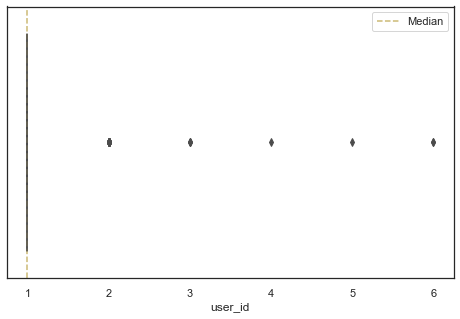

In [212]:
x = df_recipient['user_id']
sns.boxplot(x)
line1 = plt.axvline(x.median(), color="y", linestyle="--", label = "Median")
first_legend = plt.legend(handles=[line1], loc=1)
print("Mean:", x.mean())
print("Median:", x.median())
print("percentile25:", x.quantile(.25))
print("percentile95:", x.quantile(.95))
print("percentile99:", x.quantile(.9999))
print("Std Dev:", x.std())
plt.show()

### EDA 2 columns

In [134]:
df_2col = df_clean[['transfer_sequence', 'invoice_value', 'user_id','target_recipient_id', 'tenure_acc_created_days', 'days_since_previous_req']]
df_2col['suspect_transfer'] = np.where((df_clean['transfer_sequence'] <=7)&(df_clean['invoice_value'] >2700), 'risky', 'normal')
df_2col['suspect_tenure'] = np.where((df_clean['tenure_acc_created_days'] <=14)&(df_clean['invoice_value'] >2700), 'risky', 'normal')
df_2col['suspect_prev_req'] = np.where((df_clean['days_since_previous_req'] <=1)&(df_clean['invoice_value'] >2700), 'risky', 'normal')

<ipython-input-134-729ee7c0fb5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2col['suspect_transfer'] = np.where((df_clean['transfer_sequence'] <=7)&(df_clean['invoice_value'] >2700), 'risky', 'normal')
<ipython-input-134-729ee7c0fb5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2col['suspect_tenure'] = np.where((df_clean['tenure_acc_created_days'] <=14)&(df_clean['invoice_value'] >2700), 'risky', 'normal')
<ipython-input-134-729ee7c0fb5b>:4: SettingWithCopyWarning: 
A value is trying to be 

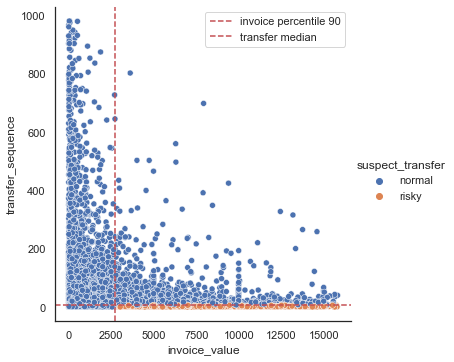

In [110]:
#invoice value vs tranfer sequence
sns.relplot(x="invoice_value", y="transfer_sequence", hue = 'suspect_transfer', data=df_2col[(df_2col['transfer_sequence'] <1000)&(df_2col['invoice_value'] <15824.46)])
line1 = plt.axvline(2700, color="r", linestyle="--", label = "invoice percentile 90")
line2 = plt.axhline(7, color="r", linestyle="--", label = "transfer median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

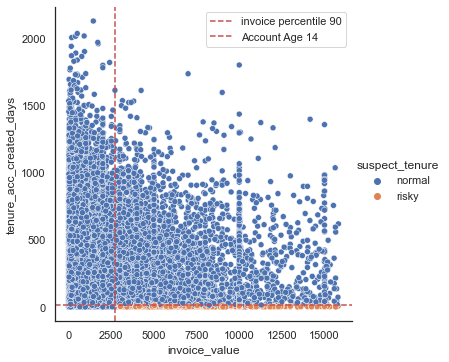

In [206]:
#invoice value vs tranfer sequence
sns.relplot(x="invoice_value", y="tenure_acc_created_days", hue = 'suspect_tenure', data=df_2col[(df_2col['transfer_sequence'] <1000)&(df_2col['invoice_value'] <15824.46)])
line1 = plt.axvline(2700, color="r", linestyle="--", label = "invoice percentile 90")
line2 = plt.axhline(14, color="r", linestyle="--", label = "Account Age 14")
first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

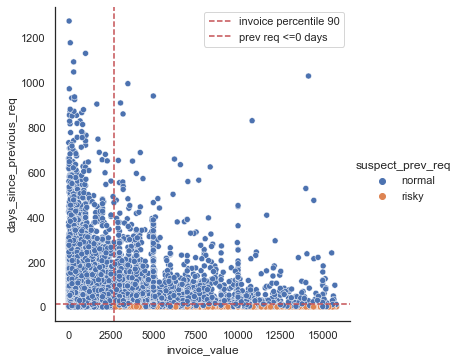

In [205]:
#invoice value vs tranfer sequence
sns.relplot(x="invoice_value", y="Íﬁ", hue = 'suspect_prev_req', data=df_2col[(df_2col['transfer_sequence'] <1000)&(df_2col['invoice_value'] <15824.46)])
line1 = plt.axvline(2700, color="r", linestyle="--", label = "invoice percentile 90")
line2 = plt.axhline(14, color="r", linestyle="--", label = "prev req <=0 days")
first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()

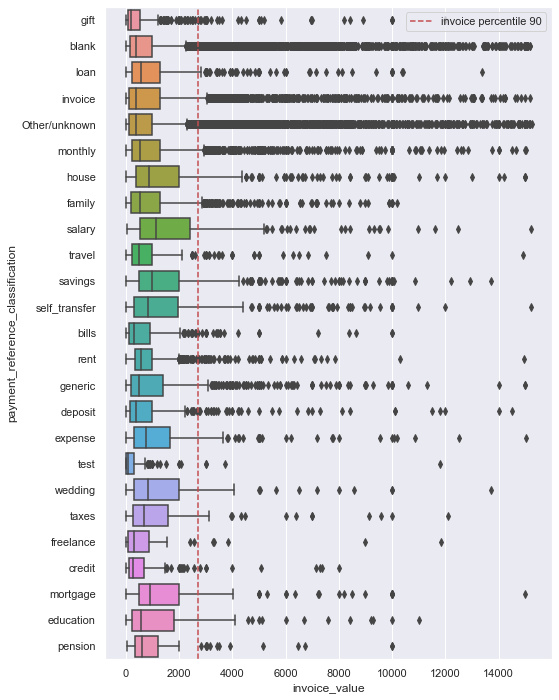

In [207]:
sns.set(rc={'figure.figsize':(8,12)})

sns.boxplot(x="invoice_value",
                y= 'payment_reference_classification',
                data=df_clean[(df_clean['invoice_value'] <15284)])
line1 = plt.axvline(2700, color="r", linestyle="--", label = "invoice percentile 90")
first_legend = plt.legend(handles=[line1], loc=1)

<AxesSubplot:xlabel='invoice_value', ylabel='payment_type'>

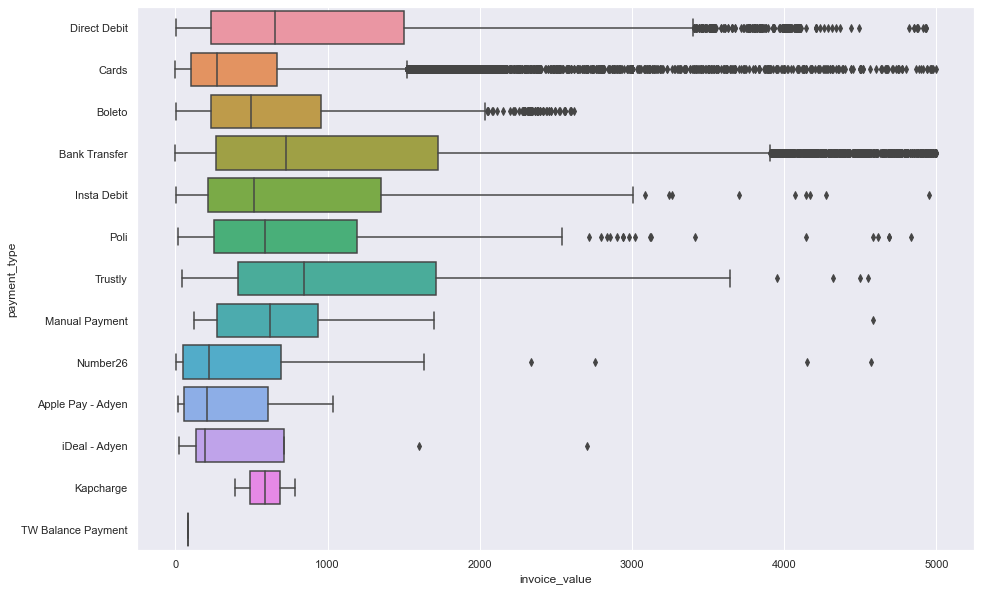

In [26]:
sns.boxplot(x="invoice_value",
                y = 'payment_type',
                data=df_clean[(df_clean['transfer_sequence'] <1000)&(df_clean['invoice_value'] <5000)])

<AxesSubplot:xlabel='invoice_value', ylabel='flag_personal_business'>

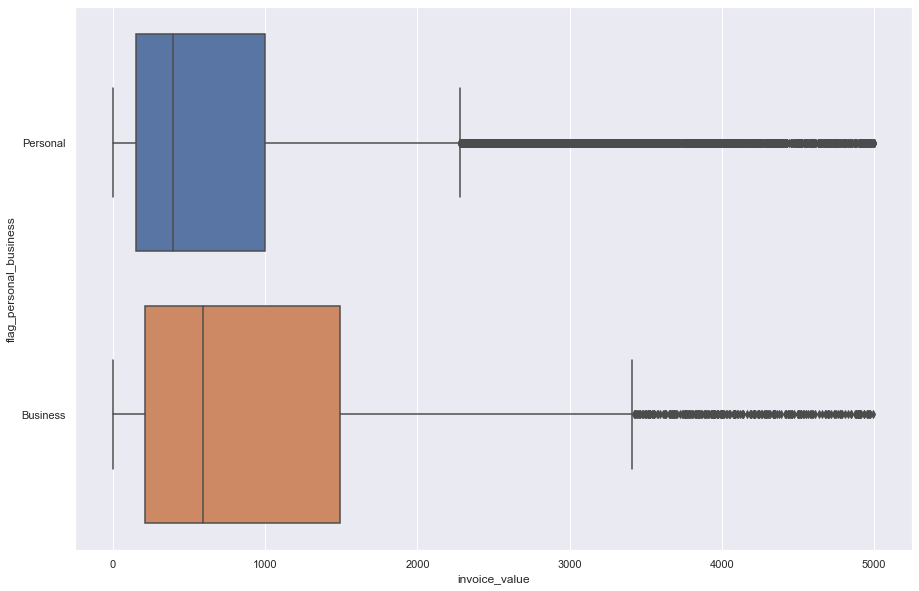

In [27]:
sns.boxplot(x="invoice_value",
                y = 'flag_personal_business',
                data=df_clean[(df_clean['transfer_sequence'] <1000)&(df_clean['invoice_value'] <5000)])

<AxesSubplot:xlabel='recipient_country_code', ylabel='invoice_value'>

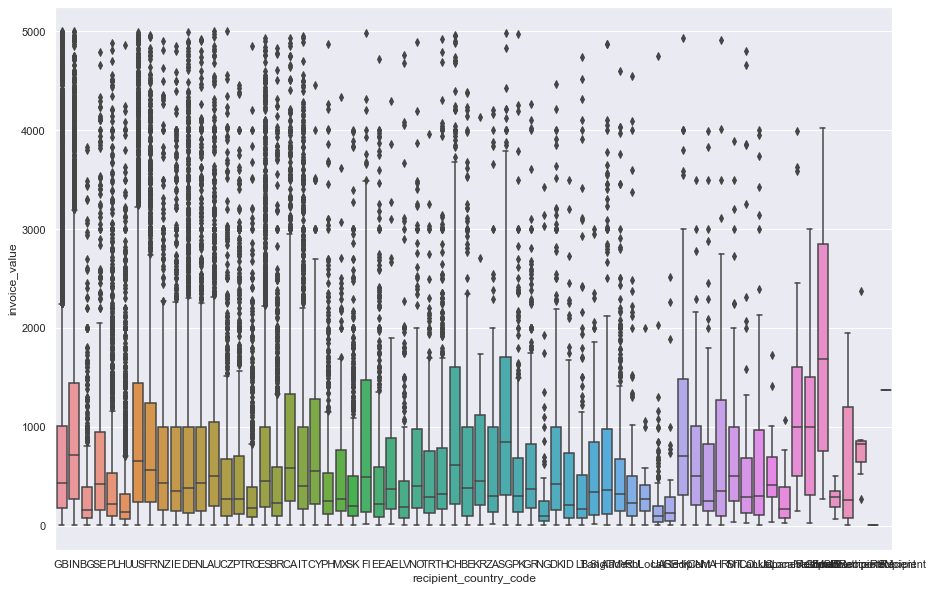

In [28]:
sns.boxplot(y="invoice_value",
                x = 'recipient_country_code',
                data=df_clean[(df_clean['transfer_sequence'] <1000)&(df_clean['invoice_value'] <5000)])

<AxesSubplot:xlabel='transfer_to_self', ylabel='invoice_value'>

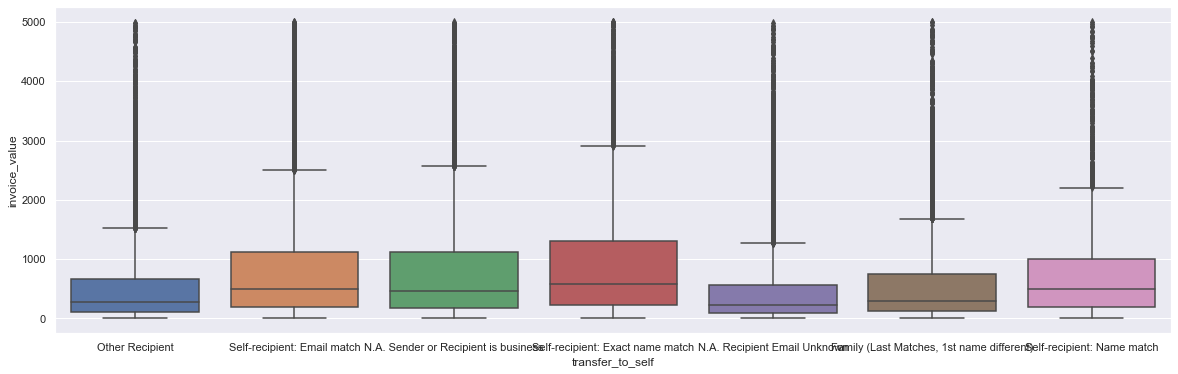

In [20]:
sns.boxplot(y="invoice_value",
                x = 'transfer_to_self',
                data=df_clean[(df_clean['transfer_sequence'] <1000)&(df_clean['invoice_value'] <5000)])

### Network

In [157]:
df_rec_susp.head()

,target_recipient_id,request_id,user_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,invoice_value,transfer_sequence
22069,3b66475e924ac6f5cdb845930d772529,16,6,04/07/2013 17:30,3,6,1,2,2,2548.716178,1429.0
31732,55602ba1d012407008f2c555b98fa9ef,6,6,06/05/2016 14:00,5,6,1,1,1,399.174792,1.0
89265,f144f57b8e574a181463aed16a6092e3,5,5,07/02/2016 22:41,4,5,1,1,2,1648.719326,4.0
3880,0aa79d6a6ca2c2770ee188d62b162516,4,4,15/06/2016 11:40,4,4,1,1,1,61.611661,1.0
48503,828cf566b7a7a6704f3d938c4611e28b,3,3,21/07/2016 16:26,3,3,1,1,1,923.576804,10.0


In [162]:
df_network[df_network['target_recipient_id'] == '55602ba1d012407008f2c555b98fa9ef']

,user_id,target_recipient_id,date_user_created,request_id,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,invoice_value,payment_status,transfer_to_self,date_request_submitted,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,tenure_acc_created_days
80177,58cf90109c34a2ac99812c781d7b6dc3,55602ba1d012407008f2c555b98fa9ef,24/05/2016 21:26,bf2f6639ce48f7fe5c613ffa061e1ce8,PT,Personal,NaN,25/05/2016 17:30,NaN,Cancelled,N.A. Sender or Recipient is business,25/05/2016 17:30,invoice,Desktop Web,1.0,NaN,25/05/2016 17:30,NaN,1
87471,045c24af1d23d6490e54d52d5375a7ad,55602ba1d012407008f2c555b98fa9ef,13/11/2016 12:39,d6afea9a76b5275f30b33242f8db66fd,PT,Personal,Cards,15/11/2016 16:10,35.820000,Transferred,N.A. Sender or Recipient is business,15/11/2016 16:10,invoice,Desktop Web,1.0,NaN,15/11/2016 16:10,16/11/2016 07:17,2
88571,e423c71f73dca7a940b474e3cb5f7e4a,55602ba1d012407008f2c555b98fa9ef,06/05/2016 14:00,4f7de90eaf6786b4c582d2a8abdbaf37,PT,Personal,Cards,03/10/2016 09:24,22.474523,Transferred,N.A. Sender or Recipient is business,03/10/2016 09:24,invoice,Desktop Web,1.0,NaN,03/10/2016 09:24,03/10/2016 12:35,150


In [176]:
from pyvis.network import Network

got_net = Network(height='750px', width='100%', font_color='grey', notebook=True)

# set the physics layout of the network
got_data = df_network

sources = got_data['user_id']
targets = got_data['target_recipient_id']
# weights = got_data['Weight']

edge_data = zip(sources, targets) #, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
#     w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('gameofthrones.html')
